In [18]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import tweepy
import time 

In [19]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [20]:
# Import Twitter API Keys
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [21]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [22]:
# select news sources
news_source = ["FoxNews", "CNN", "BBCWorld", "CBSNews", "nytimes"]

In [23]:
# create dictionary for holding tweet information

tweet_data = {
    "tweet_number":[],
    "tweet_source": [],
    "tweet_text": [],
    "tweet_date": [],
    "tweet_vader_score": [],
    "tweet_neg_score": [],
    "tweet_pos_score": [],
    "tweet_neu_score": [],
}

In [24]:
# GRABBING 100 TWEETS FROM EACH SITE
for x in range(5):
    # loop thru news sources
    for source in news_source:
        # grab tweets using api variable that we created
        tweets = api.user_timeline(source, page=x)
        for tweet in tweets:
            # grab all data from json returned by twitter
            tweet_data["tweet_source"].append(tweet["user"]["name"])
            tweet_data["tweet_text"].append(tweet["text"])
            tweet_data["tweet_date"].append(tweet["created_at"])
            # run sentiment analysis
            tweet_data["tweet_vader_score"].append(analyzer.polarity_scores(tweet["text"])["compound"])
            tweet_data["tweet_pos_score"].append(analyzer.polarity_scores(tweet["text"])["pos"])
            tweet_data["tweet_neu_score"].append(analyzer.polarity_scores(tweet["text"])["neu"])
            tweet_data["tweet_neg_score"].append(analyzer.polarity_scores(tweet["text"])["neg"])
        time.sleep(20)



In [26]:
tweet_df = pd.DataFrame(tweet_data, columns=[
    "tweet_source",
    "tweet_text",
    "tweet_date",
    "tweet_vader_score",
    "tweet_pos_score",
    "tweet_neu_score",
    "tweet_neg_score" 
    ])

In [9]:
tweet_df 

,tweet_source,tweet_text,tweet_date,tweet_vader_score,tweet_pos_score,tweet_neu_score,tweet_neg_score
0,Fox News,BEAT THE HEAT: Chuckie the orangutan cooled of...,Mon Jul 16 02:22:40 +0000 2018,0.0000,0.000,1.000,0.000
1,Fox News,"Man, woman steal fire truck, lead police on ho...",Mon Jul 16 02:14:00 +0000 2018,-0.6808,0.000,0.663,0.337
2,Fox News,MONDAY: Chris Wallace will conduct an exclusiv...,Mon Jul 16 02:09:00 +0000 2018,0.1280,0.086,0.914,0.000
3,Fox News,More than 500 fall ill after visiting Tennesse...,Mon Jul 16 02:08:29 +0000 2018,0.0516,0.203,0.608,0.189
4,Fox News,.@realDonaldTrump sees no challenger who could...,Mon Jul 16 01:59:00 +0000 2018,-0.1779,0.080,0.802,0.118
5,Fox News,.@AmbJohnBolton says Russian hacking indictmen...,Mon Jul 16 01:58:00 +0000 2018,0.4939,0.198,0.802,0.000
6,Fox News,".@kimguilfoyle: ""[President @realDonaldTrump i...",Mon Jul 16 01:57:52 +0000 2018,0.5859,0.220,0.780,0.000
7,Fox News,Chris Pratt shares touching post about cutting...,Mon Jul 16 01:54:19 +0000 2018,0.1779,0.112,0.812,0.076
8,Fox News,".@kimguilfoyle on Trump Putin summit: ""This is...",Mon Jul 16 01:47:11 +0000 2018,0.7351,0.256,0.744,0.000
9,Fox News,"MONDAY on #Hannity, @seanhannity has the first...",Mon Jul 16 01:46:00 +0000 2018,0.0000,0.000,1.000,0.000


In [27]:
tweet_df.to_csv("Sentiments_Analysis.csv")

In [28]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
tweet_source         500 non-null object
tweet_text           500 non-null object
tweet_date           500 non-null object
tweet_vader_score    500 non-null float64
tweet_pos_score      500 non-null float64
tweet_neu_score      500 non-null float64
tweet_neg_score      500 non-null float64
dtypes: float64(4), object(3)
memory usage: 27.4+ KB


In [29]:
# Subset DataFrame by each Media Source 
bbc = tweet_df.loc[tweet_df["tweet_source"] == "BBCWorld"]
cbs = tweet_df.loc[tweet_df["tweet_source"] == "CBSNews"]
cnn = tweet_df.loc[tweet_df["tweet_source"] == "CNN"]
fox = tweet_df.loc[tweet_df["tweet_source"] == "FoxNews"]
nyt = tweet_df.loc[tweet_df["tweet_source"] == "nytimes"]

NameError: name 'datetime' is not defined

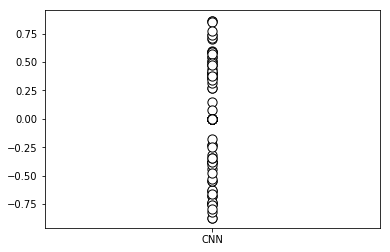

In [30]:
# Create scatter plots
plt.scatter(bbc['tweet_source'], bbc['tweet_vader_score'], c='pink',edgecolor='black', s=85, alpha=1, label='BBC')
plt.scatter(cbs['tweet_source'], cbs['tweet_vader_score'], c='purple',edgecolor='black', s=85, alpha=1, label='CBS')
plt.scatter(cnn['tweet_source'], cnn['tweet_vader_score'], c='white',edgecolor='black' , s=85, alpha=1, label='CNN')
plt.scatter(fox['tweet_source'], fox['tweet_vader_score'], c='blue',edgecolor='black', s=85, alpha=1, label='Fox')
plt.scatter(nyt['tweet_source'], nyt['tweet_vader_score'], c='yellow',edgecolor='black', s=85, alpha=1, label='New York Times')


# Incorporate other Plot features
now = datetime.now()
now = now.strftime("%m-%d-%Y")

plt.title(f"Mood of the Media") 
plt.xlabel("Tweet")
plt.xlim(110,-10)
plt.ylabel("Tweet Mood")
plt.ylim(-1.2,1.2)
plt.legend(bbox_to_anchor=(1, 1), title='News Sources')
plt.grid(True, ls='dashed')


# Save file to Output folder
plt.savefig("Mood_Media.png")

plt.show()

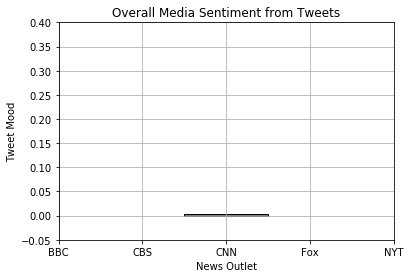

In [17]:
# Create a bar chart
plt.bar(0, bbc['tweet_vader_score'].mean(), edgecolor = 'black', color='blue', width=1)
plt.bar(1, cbs['tweet_vader_score'].mean(), edgecolor = 'black', color='pink', width=1)
plt.bar(2, cnn['tweet_vader_score'].mean(), edgecolor = 'black', color='grey', width=1)
plt.bar(3, fox['tweet_vader_score'].mean(), edgecolor = 'black', color='yellow', width=1)
plt.bar(4, nyt['tweet_vader_score'].mean(), edgecolor = 'black', color='purple', width=1)


# Incorporate other plot features
plt.title(f"Overall Media Sentiment from Tweets")
plt.ylim(-0.05, 0.40)
plt.xlabel("News Outlet")
plt.ylabel("Tweet Mood")
x_labels = ["BBC", "CBS", "CNN", "Fox", "NYT"]
x_locations = [value for value in np.arange(5)]
plt.xticks(x_locations, x_labels)
 

#Adds a horizontal line at zero
plt.grid(True)

# Save file to Output folder
plt.savefig("Overall_Mood.png")

plt.show()